<a href="https://colab.research.google.com/github/Zeeshan00789/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING-/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [157]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [158]:
#importing drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [159]:
#importing the dataset
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module 1/Capstone Project 4/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [160]:
#first 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [161]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [162]:
#shape of dataset
df.shape

(7787, 12)

In [163]:
#all the columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [164]:
#renaming the Genre column
df.rename(columns={'listed_in':'Genres'}, inplace=True)
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'Genres', 'description'],
      dtype='object')

In [165]:
#checking duplicate values
df[df.duplicated()].count()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
Genres          0
description     0
dtype: int64

In this dataset there is no duplicate values

In [166]:
#checking data description
df.describe(include='all')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genres,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


#Handling null values

In [167]:
#checking the null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
Genres             0
description        0
dtype: int64

In [168]:
#Handling null values
df['director'].fillna('unknown director', inplace=True)
df['cast'].fillna('unknown cast', inplace=True)
df['country'].fillna('unknown country', inplace=True)

In [169]:
#'date_added' and 'rating' contains an insignificant portion of the data so we will drop them from the dataset
df.dropna(subset=['date_added','rating'], inplace=True)

#EDA

#1. Type

In [170]:
#total counts of movies and shows
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

##Type of content available in Netflix

Text(0, 0.5, 'Type')

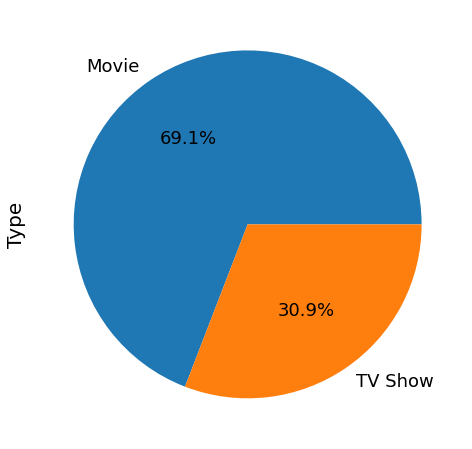

In [171]:
#figure size
plt.figure(figsize=(10,8))
#plot of pie chart of type
df['type'].value_counts().plot(kind='pie',autopct='%1.1f%%',textprops={'fontsize': 18})
plt.ylabel('Type', fontsize= 20)

* In our dataset there is round 69 % content as movies and remaining 31 % are TV shows
*  Netflix is releasing more movies than TV shows.

#2. Rating

In [172]:
#unique values of rating
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [173]:
#Assigning the Ratings into grouped categories
df['target_ages']=df['rating'].replace({'TV-PG':'Older Kids','TV-MA':'Adults',
                                        'TV-Y7-F7':'Older Kids','TV-Y7':'Older Kids',
                                        'TV-14':'Teens', 'R':'Adults','TV-Y': 'Kids',
                                        'NR': 'Adults', 'PG-13': 'Teens', 'TV-G': 'Kids',
                                        'PG': 'Older Kids', 'G': 'Kids','UR': 'Adults',
                                        'NC-17': 'Adults'})

In [174]:
#creating two extra columns
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

##Point Plot of Rating

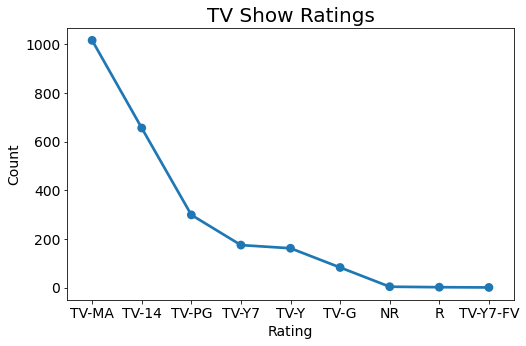

In [175]:
#Rating based on rating system of all TV Shows
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)

fig_dims = (8,5)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
#title
plt.title('TV Show Ratings',size='20')
#labelling
plt.xlabel('Rating', fontsize= 14)
plt.ylabel('Count', fontsize= 14)
#font size of x and y axis values
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


* Most of contents belong to rating TV-MA category followed by TV-14 and TV-PG
* Very less contents of rating R and TV-Y7-F

##Count of content available for all age groups

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.]),
 <a list of 9 Text major ticklabel objects>)

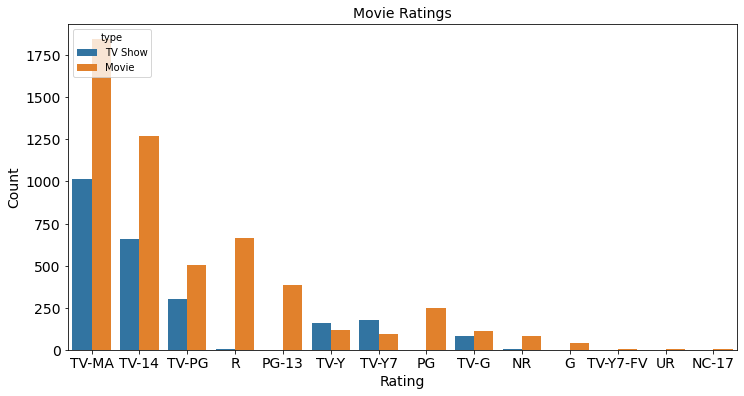

In [176]:
#Movie Ratings based on Target Age Groups
plt.figure(figsize=(12,6))
plt.title('Movie Ratings', size=14)
sns.countplot(x=df['rating'],hue=df['type'],data=df,order=df['rating'].value_counts().index)

#labelling
plt.xlabel('Rating', fontsize= 14)
plt.ylabel('Count', fontsize= 14)

#font size of x and y axis values
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


* Most of contents are in TV-MA, TV-14 and TV-PG ratings for both Movies and TV Shows.
* Contents for TV Shows are more than movies in rating TV-Y and TV-Y7

* The content for children and general audiences is less in netflix eg. TV-Y7, TV-Y7-FV, G, etc

##Count of Movies and TV shows available for all ages

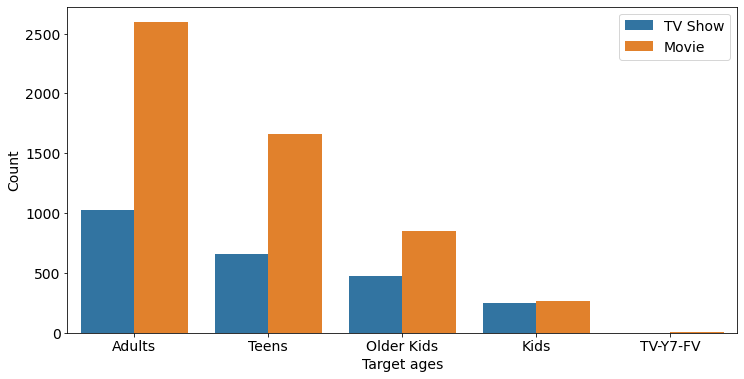

In [177]:

#Plot of target age and type
plt.figure(figsize=(12,6))
sns.countplot(x='target_ages',hue='type', data=df)


#labelling
plt.xlabel('Target ages', fontsize= 14)
plt.ylabel('Count', fontsize= 14)

#font size of x and y axis values
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

* Movies are more than TV Shows for all type age group.
* The content for adults are higher followed by teens and older kids in both movies and TV Shows.
* For TV-Y7-FV age group have very less content.


#3. Release Year

##Year of releasing movies and TV shows

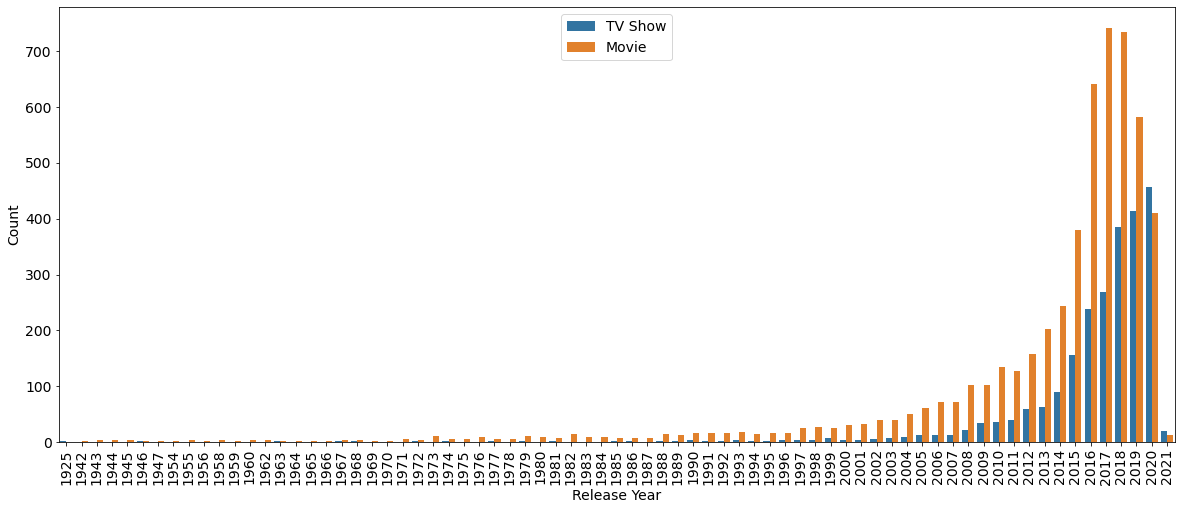

In [178]:
#plot of release year
plt.figure(figsize=(20,8))
sns.countplot(x='release_year',hue='type', data=df)

#font size of x and y axis values
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

#labelling
plt.xlabel('Release Year',fontsize=14)
plt.ylabel('Count',fontsize=14)
#legend
plt.legend(loc='upper center',fontsize=14)


* In year 2017 Movies released is maximum
* In year 2020 and 2021 TV shows are released more than movies
* After 2018 number of movies are decreased releasing
* There is a significant drop in the number of movies and television episodes produced after 2020

#4. Added Year in Netflix

##Count Movies and TV shows added to netflix

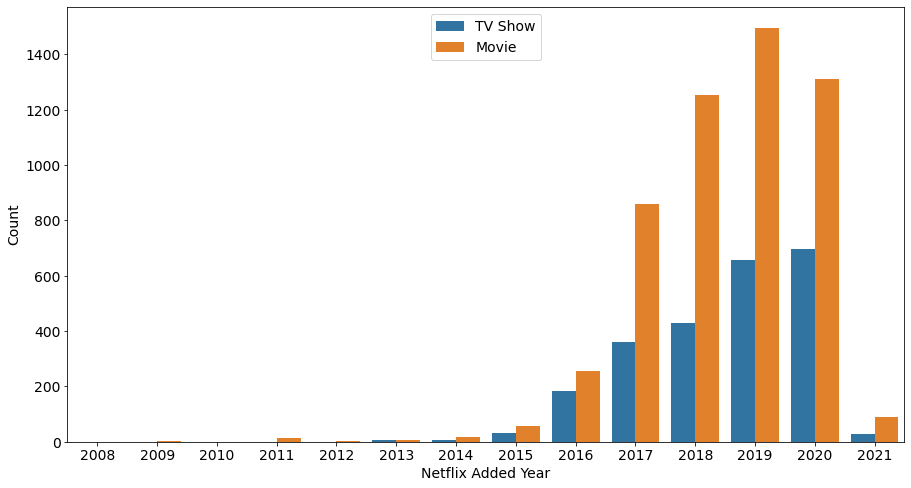

In [179]:
# Creating 'year' column
df['added_year'] =pd.to_datetime (df['date_added']).dt.year
#plotting barplot for each year
plt.figure(figsize = (15,8))
sns.countplot(x='added_year', hue='type',data=df)


#font size of x and y axis values
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#labelling
plt.xlabel('Netflix Added Year',fontsize=14)
plt.ylabel('Count',fontsize=14)
#legend
plt.legend(loc='upper center',fontsize=14)

The number of shows and movies added in 2019 and 2020 are maximum, number of shows decreased for year 2021.

##Total movies and shows added Per Year

In [180]:
#Count of added year of movies and TV show 
year_count=df['added_year'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','added_year':'count'})
movies['added_year'] = pd.to_datetime(movies['date_added']).dt.year
movies_year=movies['added_year'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','added_year':'count'})
tv_shows['added_year'] = pd.to_datetime(tv_shows['date_added']).dt.year
shows_year=tv_shows['added_year'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','added_year':'count'})

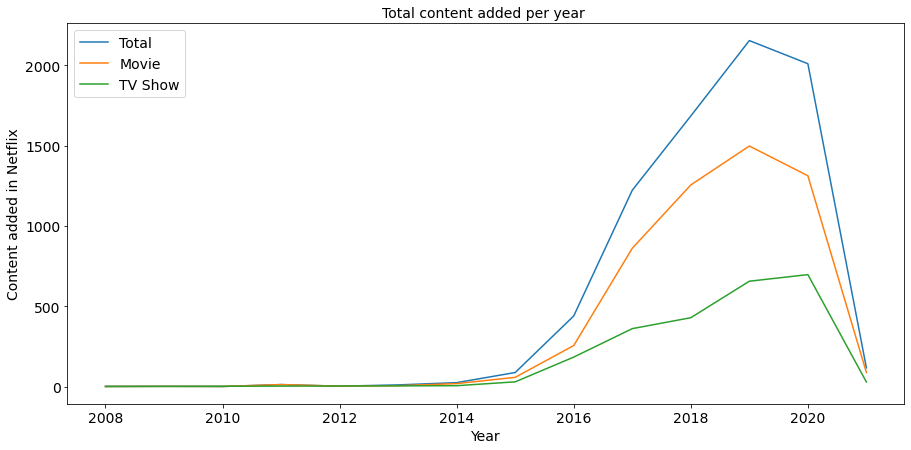

In [181]:
#line plot of content added per year
plt.figure(figsize = (15,7))

#plot
sns.lineplot(data=year_count,x='year', y='count')
sns.lineplot(data=movies_year,x= 'year', y='count')
sns.lineplot(data=shows_year,x= 'year', y='count')

#title
plt.title("Total content added per year ", fontsize=14)

#legend
plt.legend(['Total','Movie','TV Show'],fontsize=14)

#font size of x and y axis values
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#labelling
plt.ylabel("Content added in Netflix", fontsize=14)
plt.xlabel("Year", fontsize=14)
plt.show()

Rate at which movies are increasing is more than TV shows are increasing.

#5. Genres

##Top genres available in Netflix

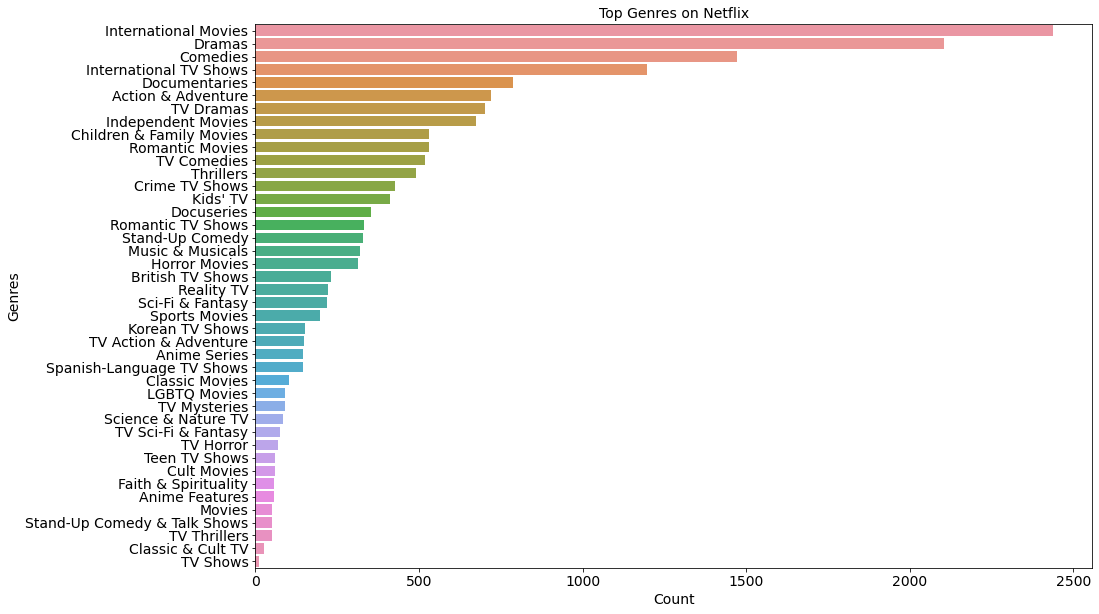

In [182]:

# Plot of top genres
filtered_genres = df.set_index('title').Genres.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(15,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:42])

#title
plt.title('Top Genres on Netflix', fontsize=14)

#labelling
plt.xlabel('Count', fontsize=14)
plt.ylabel('Genres', fontsize=14)

#font size of x and y axis values
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

* International movies, dramas, and comedies are the top three genres with the most content on Netflix.
* Rarest genres are available are Classic & Cult TV, TV shows

#6. Duration

##Distribution of movies duration

Text(0.5, 1.0, 'Distplot with Normal distribution for Movies')

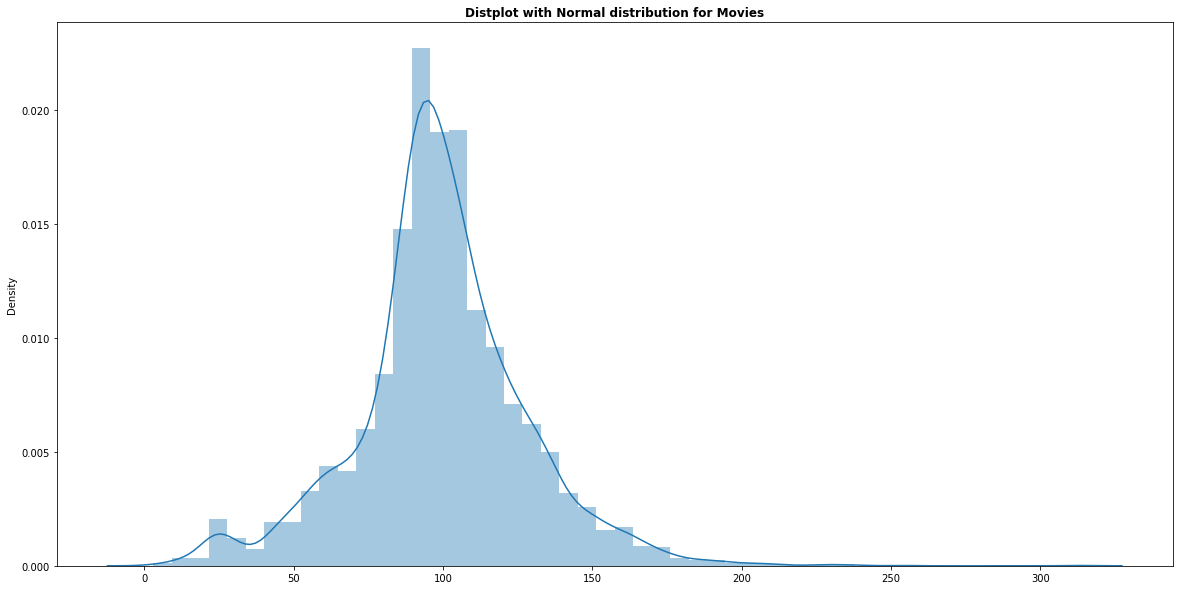

In [183]:
#plot of normal distribution of duration
plt.figure(figsize=(20,10))
#plot
sns.distplot(movies['duration'].str.extract('(\d+)'))
#title
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")

The majority of the films are between 80 and 120 minutes long.

##Distribution of TV shows

Text(0.5, 1.0, 'Distribution for TV Shows')

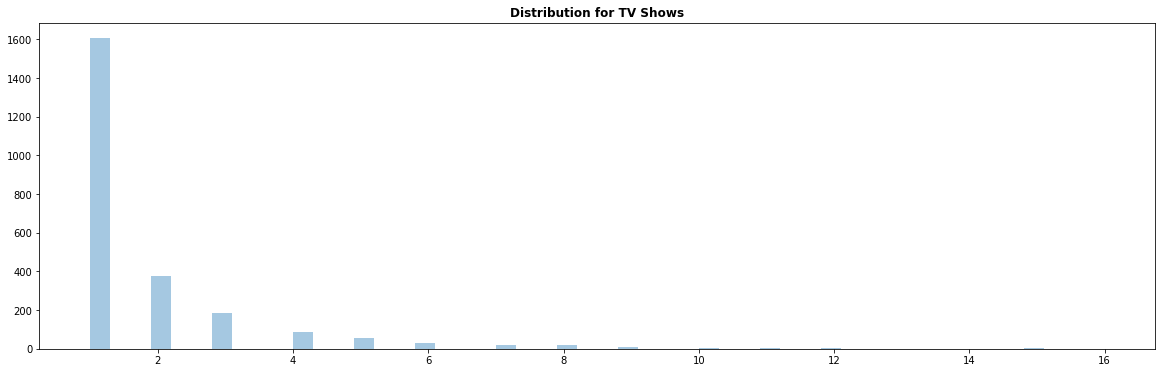

In [184]:
#plot of duration of Tv shows

#fig size
plt.figure(figsize=(20,6))
#plot
sns.distplot(tv_shows['duration'].str.extract('(\d+)'), kde=False)
#title
plt.title('Distribution for TV Shows',fontweight="bold")

Highest number of tv_shows consisting of single season.

#7. Country

##Top 30 country with most content on Netflix

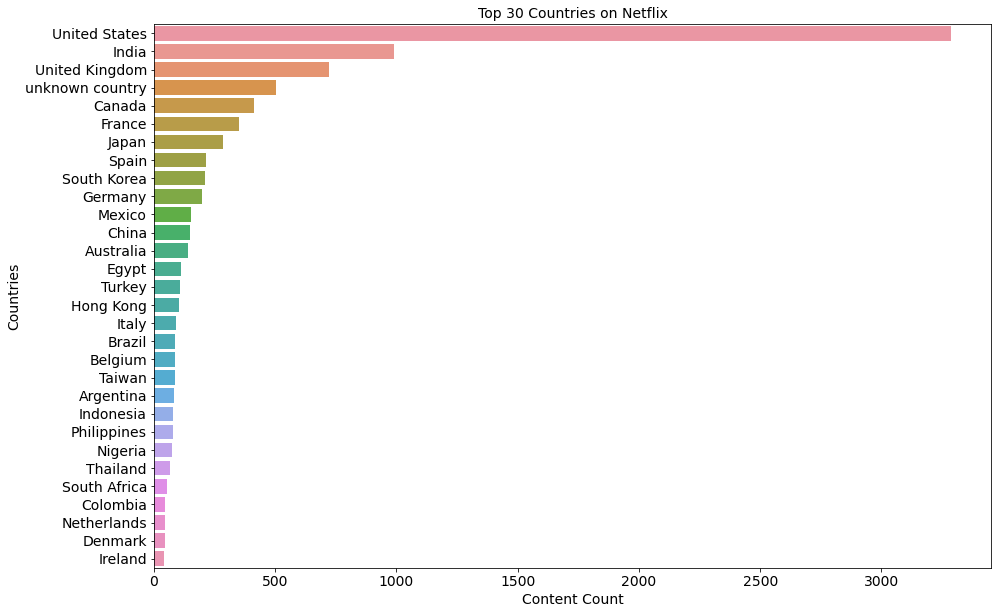

In [185]:
#plot of top countries 
filtered_countries = df.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']

#fig size
plt.figure(figsize=(15,10))

#plot
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:30])

#title
plt.title('Top 30 Countries on Netflix', fontsize=14)

#label
plt.xlabel('Content Count', fontsize=14)
plt.ylabel('Countries', fontsize=14)

#font size of x and y axis values
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

* United States have maximum content in Netflix followed by India and United Kingdom.
* United States have content twice than Indian contents.

##Type of content available in all countries

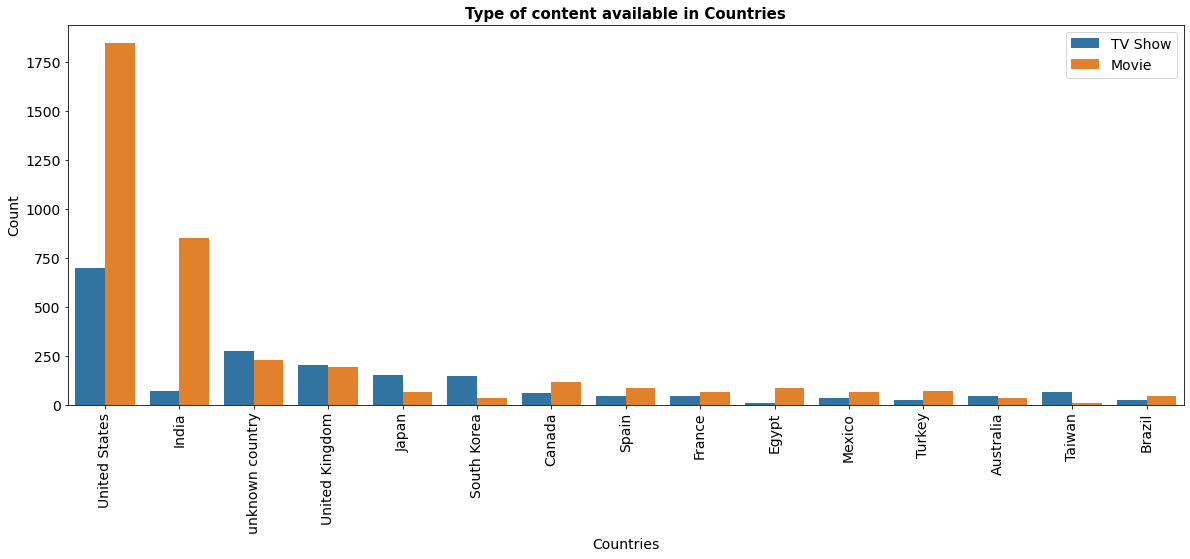

In [186]:
#plot of type and countries

#fig size
plt.figure(figsize=(20,7))

#plot
sns.countplot(x=df['country'], order=df['country'].value_counts().index[0:15],hue=df['type'])

#label
plt.ylabel('Count', fontsize=14)
plt.xlabel('Countries', fontsize=14)

#font size of x and y axis values
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

#legend
plt.legend(fontsize=14)

#title
plt.title('Type of content available in Countries', fontsize=15, fontweight='bold')
plt.show()

* United States have maximum movies in Netflix followed by India and United Kingdom.
* United States have content twice than Indian contents.
* TV Shows are maximum in United States followed by United Kingdom and Japan.
* TV Shows in Egypt are less than all countries

## Target age of content available in all countries

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 <a list of 8 Text major ticklabel objects>)

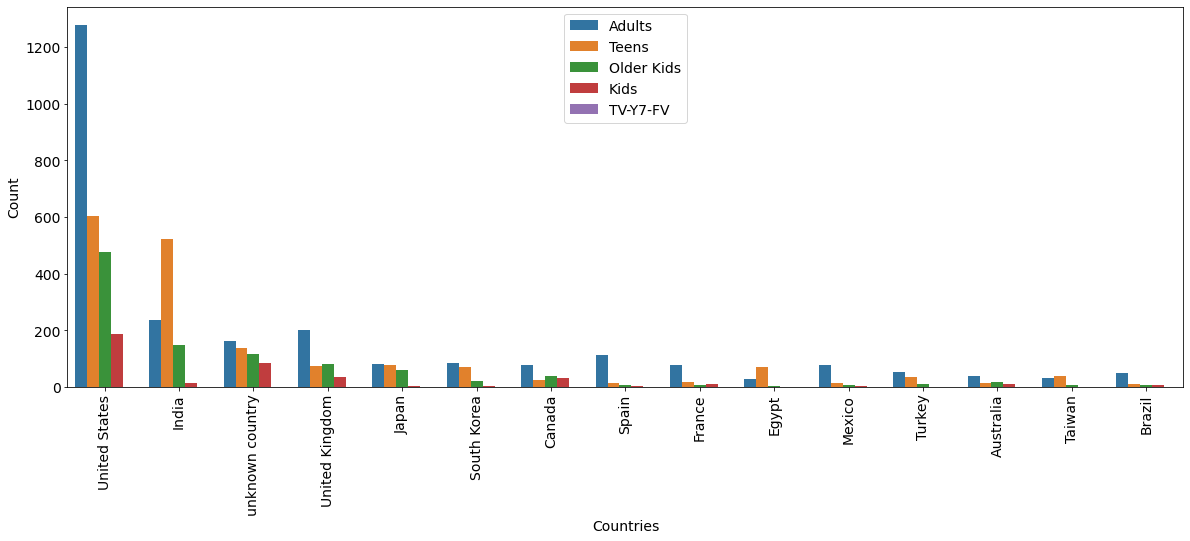

In [187]:
#plot of target ages and countries

#figure size
plt.figure(figsize=(20,7))

# plot
sns.countplot(x=df['country'], order=df['country'].value_counts().index[0:15],hue=df['target_ages'])

#legends
plt.legend(loc='upper center',fontsize=14)

#label
plt.ylabel('Count', fontsize=14)
plt.xlabel('Countries', fontsize=14)

#font size of x and y axis values
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

* Content for adults are maximum in United States, India, United Kingdom.
* Content for teens and kids are maximum in United States and India.
* Content is less in brazil and taiwan for every ages.

#Data Preprocessing

In [188]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [189]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


##1. Description

##Removing Punctuation

In [190]:
#20 rows from description
df['description'].head(10)

0    In a future where the elite inhabit an island ...
1    After a devastating earthquake hits Mexico Cit...
2    When an army recruit is found dead, his fellow...
3    In a postapocalyptic world, rag-doll robots hi...
4    A brilliant group of students become card-coun...
5    A genetics professor experiments with a treatm...
6    After an awful accident, a couple admitted to ...
7    After one of his high school students attacks ...
8    When a doctor goes missing, his psychiatrist w...
9    An architect and his wife move into a castle t...
Name: description, dtype: object

In [191]:
def remove_punct(text):
  ''' a function for removing punctuation'''
  import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks
  translator=str.maketrans('','',string.punctuation)
    # return the text stripped of punctuation marks
  return text.translate(translator)

In [192]:
#applying function
df['description'] = df['description'].apply(remove_punct)
df['description'].head(10)

0    In a future where the elite inhabit an island ...
1    After a devastating earthquake hits Mexico Cit...
2    When an army recruit is found dead his fellow ...
3    In a postapocalyptic world ragdoll robots hide...
4    A brilliant group of students become cardcount...
5    A genetics professor experiments with a treatm...
6    After an awful accident a couple admitted to a...
7    After one of his high school students attacks ...
8    When a doctor goes missing his psychiatrist wi...
9    An architect and his wife move into a castle t...
Name: description, dtype: object

##Removing Stop Words

In [193]:
#extracting the stopwords from nltk library
sw=stopwords.words('english')
#displaying the stopwords 
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

##Function to remove stopwords

In [194]:
def remove_stopwords(text):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  text=[word.lower() for word in text.split() if word not in sw]
  # joining the list of words with space separator
  return ' '.join(text)

In [195]:
#applying function
df['description']=df['description'].apply(remove_stopwords)
df['description'].head(10)

0    in future elite inhabit island paradise far cr...
1    after devastating earthquake hits mexico city ...
2    when army recruit found dead fellow soldiers f...
3    in postapocalyptic world ragdoll robots hide f...
4    a brilliant group students become cardcounting...
5    a genetics professor experiments treatment com...
6    after awful accident couple admitted grisly ho...
7    after one high school students attacks dedicat...
8    when doctor goes missing psychiatrist wife tre...
9    an architect wife move castle slated become lu...
Name: description, dtype: object

In [196]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# fit the vectorizer using the text data
tfid_vectorizer.fit(df['description'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [197]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_lem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_lem = vocab_bef_lem.sort_values(ascending=False)

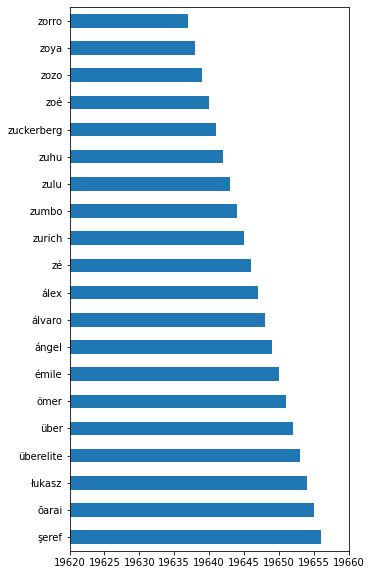

In [198]:
#top 20 words in description
top_vacab = vocab_bef_lem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (19620, 19660))

## Tokenization

In [199]:
df['description']=df['description'].apply(lambda x:word_tokenize(x))
df['description'].head()

0    [in, future, elite, inhabit, island, paradise,...
1    [after, devastating, earthquake, hits, mexico,...
2    [when, army, recruit, found, dead, fellow, sol...
3    [in, postapocalyptic, world, ragdoll, robots, ...
4    [a, brilliant, group, students, become, cardco...
Name: description, dtype: object

In [200]:
def join_words(x):
  return " ".join(x)
df['description'] = df['description'].apply(join_words)
df['description'].head()

0    in future elite inhabit island paradise far cr...
1    after devastating earthquake hits mexico city ...
2    when army recruit found dead fellow soldiers f...
3    in postapocalyptic world ragdoll robots hide f...
4    a brilliant group students become cardcounting...
Name: description, dtype: object

##A funtion to carry out lemmatization operation

In [201]:
def lemmatization(text):
  '''a function for lemmatization in the given text'''
  lemmatizer = WordNetLemmatizer()
  text=[lemmatizer.lemmatize(word) for word in text.split()]
  return ' '.join(text)
   

In [202]:
#lemmatization for description

df['description']=df['description'].apply(lemmatization)
df['description'].value_counts().head()

multiple woman report husband missing appears looking man police officer trace cryptic connection                     3
a surly septuagenarian get another chance 20 photo snapped studio magically take 50 year life                         3
a scheming matriarch plot cut disabled stepson wife family fortune creating division within clan                      2
a blind librarian dispirited cricketer desolate psychiatrist seek retribution release life overlap eerie influence    2
a young han solo try settle old score help new buddy chewbacca crew space smuggler cunning old friend                 2
Name: description, dtype: int64

##Word cloud of Description

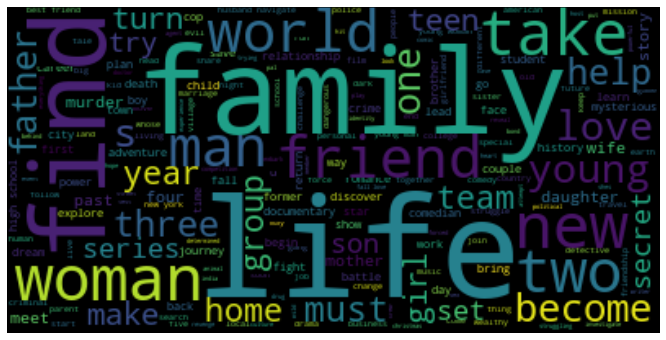

In [203]:

#subsetting df
df_wordcloud = df['description']
text = " ".join(word for word in df_wordcloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(18,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Most occurring words in the description of the tv shows and movies are Family, Friend, Love, Life, Woman, Man.

##2. Genres

In [204]:
#top genres
df['Genres'].value_counts().head(10)

Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Kids' TV                                            204
Children & Family Movies                            177
Documentaries, International Movies                 172
Children & Family Movies, Comedies                  169
Comedies, International Movies                      161
Name: Genres, dtype: int64

##Removing Punctuation

In [205]:
#appling function
df['Genres']=df['Genres'].apply(remove_punct)
df['Genres'].value_counts().head(10)

Documentaries                                     334
StandUp Comedy                                    321
Dramas International Movies                       320
Comedies Dramas International Movies              243
Dramas Independent Movies International Movies    215
Kids TV                                           204
Children  Family Movies                           177
Documentaries International Movies                172
Children  Family Movies Comedies                  169
Comedies International Movies                     161
Name: Genres, dtype: int64

##Removing stopwords from genres

In [206]:
#applying function
df['Genres']=df['Genres'].apply(remove_stopwords)
df['Genres'].value_counts().head(10)

documentaries                                     334
standup comedy                                    321
dramas international movies                       320
comedies dramas international movies              243
dramas independent movies international movies    215
kids tv                                           204
children family movies                            177
documentaries international movies                172
children family movies comedies                   169
comedies international movies                     161
Name: Genres, dtype: int64

In [207]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# fit the vectorizer using the text data
tfid_vectorizer.fit(df['Genres'])

# collect the vocabulary items used in the vectorizer
dictionary_1 = tfid_vectorizer.vocabulary_.items()

In [208]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary_1:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_lem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_lem = vocab_bef_lem.sort_values(ascending=False)

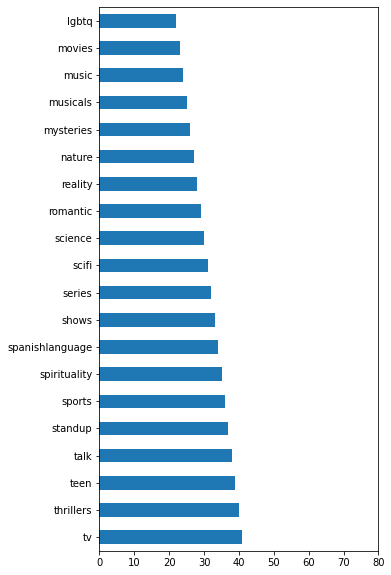

In [209]:
#top 20 words in genres
top_vocab = vocab_bef_lem.head(20)
top_vocab.plot(kind = 'barh', figsize=(5,10), xlim= (0, 80))

##Tokenization

In [210]:
df['Genres']=df['Genres'].apply(lambda x:word_tokenize(x))
df['Genres'].head()

0    [international, tv, shows, tv, dramas, tv, sci...
1                      [dramas, international, movies]
2              [horror, movies, international, movies]
3    [action, adventure, independent, movies, scifi...
4                                             [dramas]
Name: Genres, dtype: object

In [211]:
def join_words(x):
  return " ".join(x)
df['Genres'] = df['Genres'].apply(join_words)
df['Genres'].head()

0    international tv shows tv dramas tv scifi fantasy
1                          dramas international movies
2                   horror movies international movies
3    action adventure independent movies scifi fantasy
4                                               dramas
Name: Genres, dtype: object

##Applying Function for lemmatization

In [212]:
#lemmatization for genres

df['Genres']=df['Genres'].apply(lemmatization)
df['Genres'].value_counts().head()

documentary                                    334
standup comedy                                 321
drama international movie                      320
comedy drama international movie               243
drama independent movie international movie    215
Name: Genres, dtype: int64

##Word Cloud of Genres

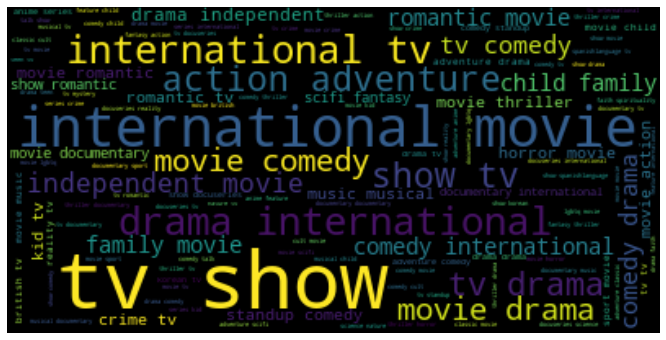

In [213]:

#subsetting df
df_wordcloud = df['Genres']
text = " ".join(word for word in df_wordcloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(18,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Most occurring words in the genres are tv show, international movie, comedy, movie drama, comedy drama.

In [214]:

#Applying Tfidf Vectorizer
tfidfmodel = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = tfidfmodel.fit_transform(df['description'])

X_tfidf.shape

(7770, 1000)

In [215]:
# convert X into array form for clustering
X = X_tfidf.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#Clustering algorithms

In [216]:
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [217]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.cm as cm

##Dimensionality reduction using PCA:

In [218]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(X)


PCA(random_state=42)

Text(0, 0.5, 'cumulative explained variance')

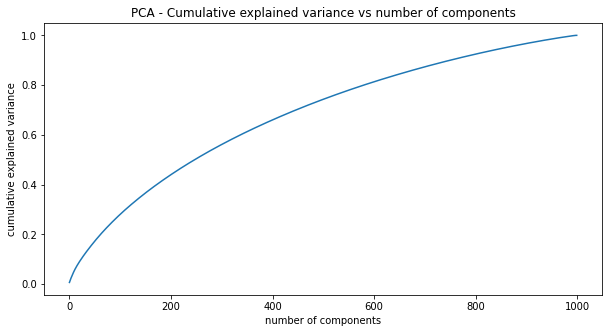

In [219]:

# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

here we can clearly spot that 80% variance is explained by 600 components only.

In [220]:
# reducing the dimensions to 600 using pca
pca = PCA(n_components=600,random_state=42)
pca.fit(X)

PCA(n_components=600, random_state=42)

In [221]:

# transformed features
X = pca.transform(X)
     

# shape of transformed vectors
X.shape
     

(7770, 600)

#Kmeans Clustering

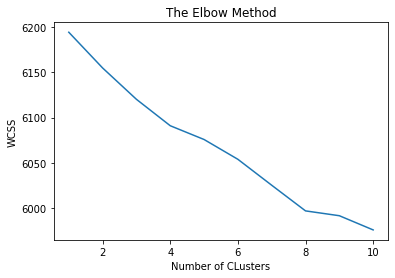

In [222]:
#Initializing the list for the values of Within Cluster Sum of Square(WCSS)  
wcss=[]

#Using for loop for iterations from 1 to 10.  
for i in range(1,11):
  #applying kmeans clustering
  kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
#plot
plt.plot(range(1,11),wcss)

#title
plt.title('The Elbow Method')

#label
plt.xlabel('Number of CLusters')
plt.ylabel('WCSS')
plt.show()

In [223]:
#sillhoute score of clusters 
sill = [] 
for i in range(2,11):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=10)
    model.fit(X)
    y1 = model.predict(X)
    score = silhouette_score(X,y1)
    sill.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))

cluster: 2 	 Sillhoute: 0.0065
cluster: 3 	 Sillhoute: 0.0091
cluster: 4 	 Sillhoute: 0.0079
cluster: 5 	 Sillhoute: 0.0101
cluster: 6 	 Sillhoute: 0.0109
cluster: 7 	 Sillhoute: 0.0116
cluster: 8 	 Sillhoute: 0.0124
cluster: 9 	 Sillhoute: 0.0128
cluster: 10 	 Sillhoute: 0.0124


In [224]:
#fitting the model
clusterer = KMeans(n_clusters=20, random_state=10)
cluster_labels=clusterer.fit_predict(X)
print(cluster_labels)


[ 9  3 15 ...  2 15  2]


In [225]:

#Predict the clusters and evaluate the silhouette score

score = silhouette_score(X, cluster_labels)
print("Silhouette score is {}".format(score))

Silhouette score is 0.01934939582924074


For n_clusters = 2 The average silhouette_score is : 0.006486488491645665
For n_clusters = 3 The average silhouette_score is : 0.009091598672190839
For n_clusters = 4 The average silhouette_score is : 0.007860225089575606
For n_clusters = 5 The average silhouette_score is : 0.010140260621793937
For n_clusters = 6 The average silhouette_score is : 0.010896555120869175
For n_clusters = 7 The average silhouette_score is : 0.011625972308756932
For n_clusters = 8 The average silhouette_score is : 0.012420035355731596
For n_clusters = 9 The average silhouette_score is : 0.01283525189252714


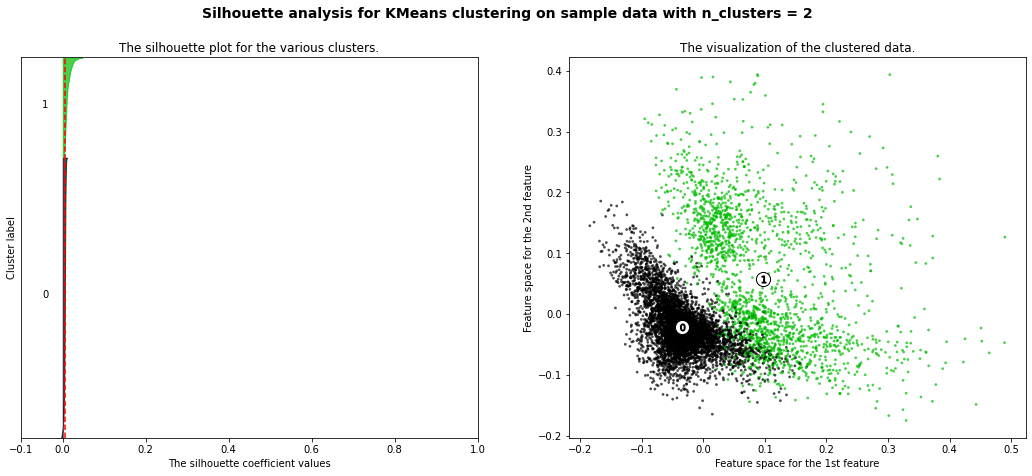

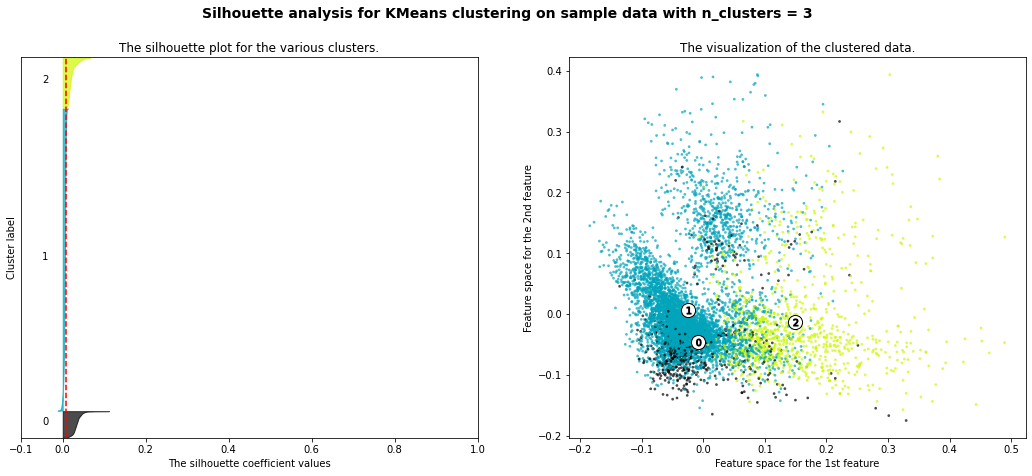

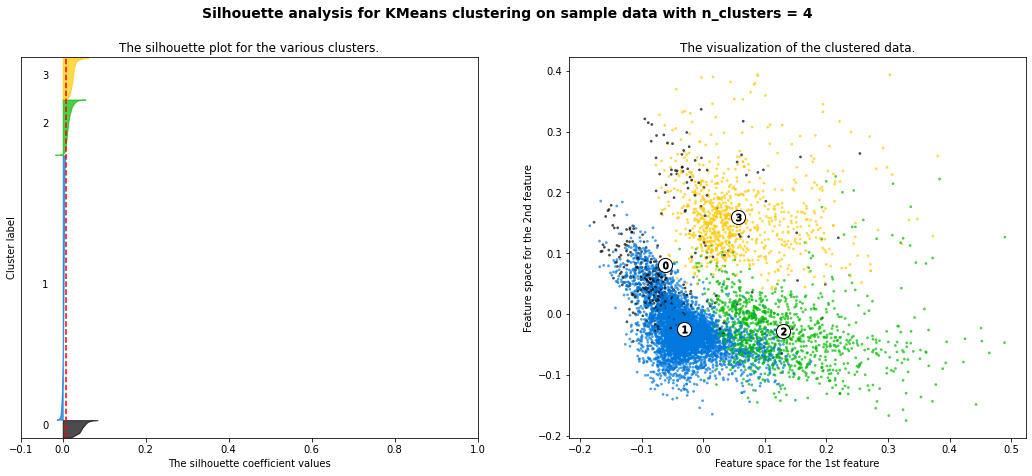

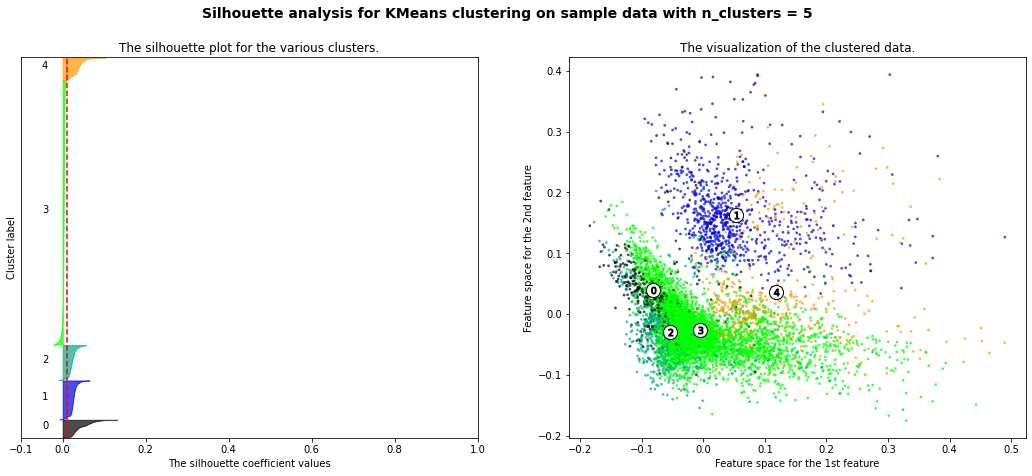

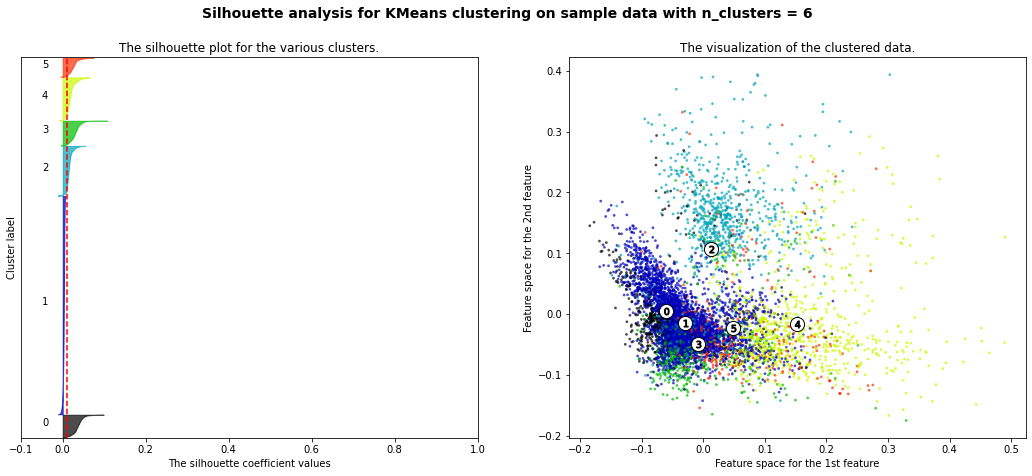

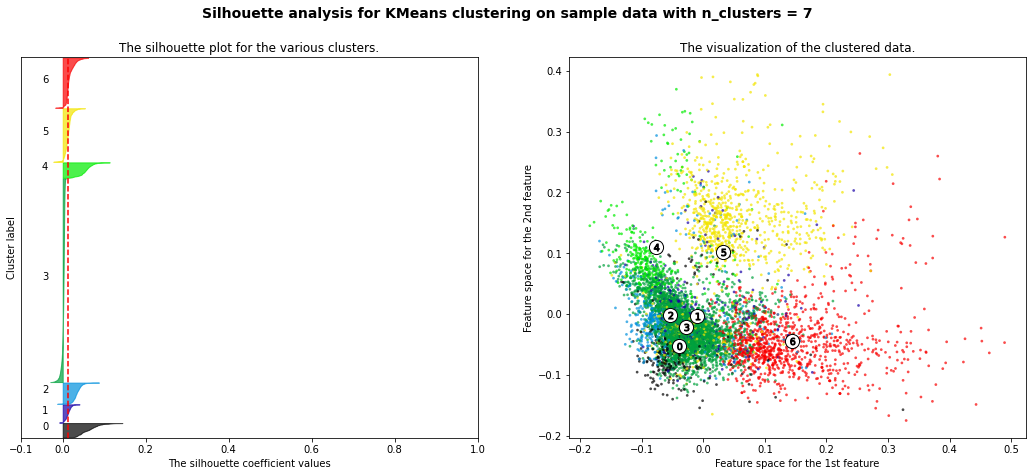

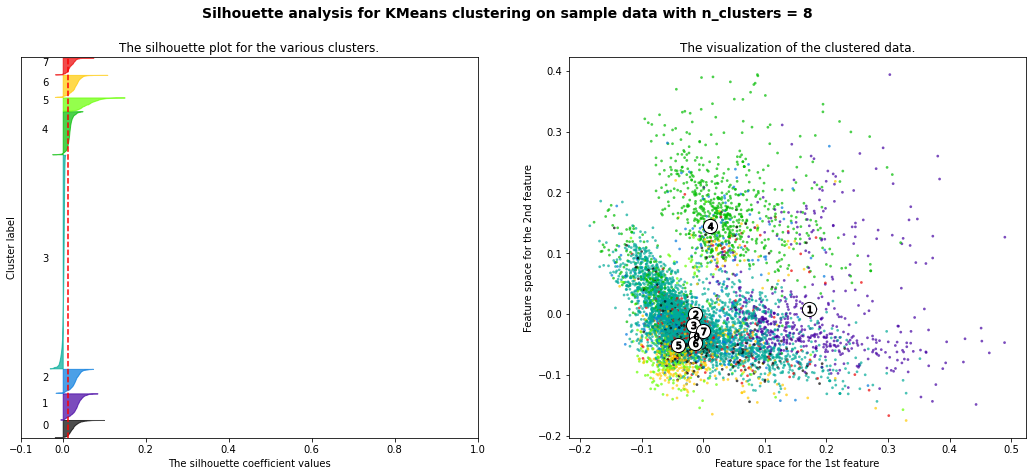

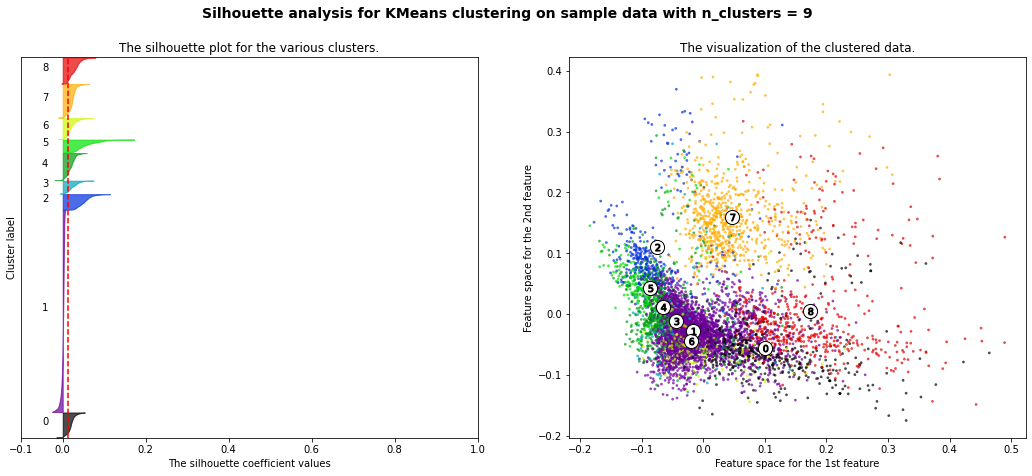

In [226]:
range_n_clusters = [i for i in range(2,10)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

#DB Scan Clustering

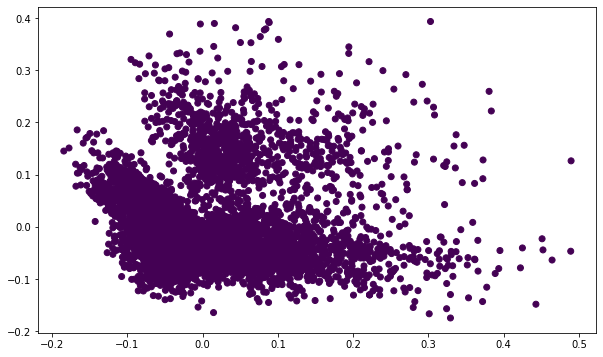

In [227]:
#Fitting DB scan model
y_pred = DBSCAN(eps=0.5, min_samples=10).fit_predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y_pred)

#Hierarchical clustering

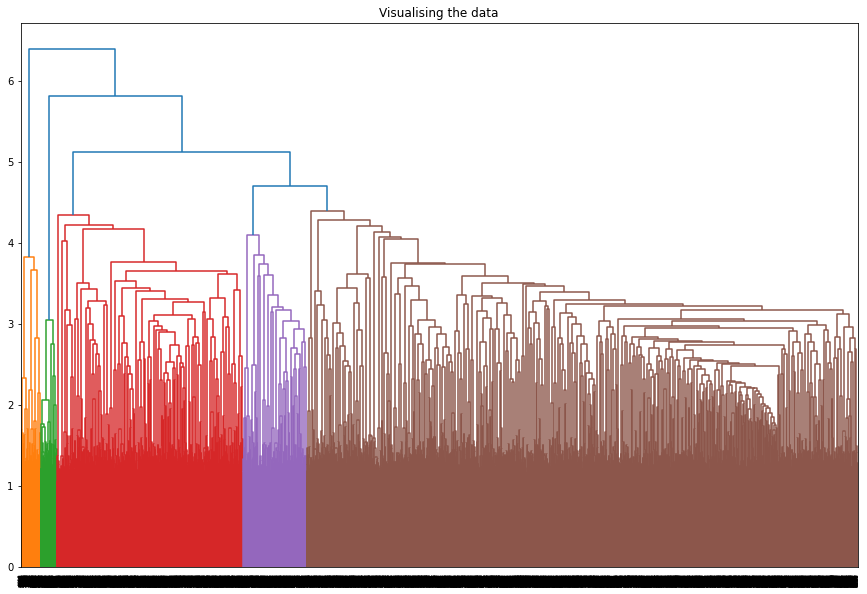

In [228]:
#dendogram
plt.figure(figsize =(15, 10))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward')))


**By applying different clustering algorithem to our dataset .we get the optimal number of cluster is equal to 4**

#Conclusion


* In our dataset there is round 69 % content as movies and remaining 31 % are TV shows.
* Most of contents belong to rating TV-MA category followed by TV-14 and TV-PG

* Netflix is more focus in mature content that is the reason why TV-MA and R rating is high.
* The content for children and general audiences is less in netflix eg. TV-Y7, TV-Y7-FV, G, etc

* Netflix has more movies than TV shows
* The number TV shows are more of Adult rating
* In year 2017 number of Movies released is maximum
* In year 2020 and 2021 TV shows are released more than movies after 2018 number of movies are decreased releasing
* The number of shows and movies added in 2019 and 2020 are maximum, number of shows decreased for year 2021.
* International movies, dramas, and comedies are the top three genres with the most content on Netflix.
* United States have maximum movies in Netflix followed by India and United Kingdom.
* TV Shows are maximum in United States followed by United Kingdom and Japan.
* Content for teens and kids are maximum in United States and India.
* Most occurring words in the description of the tv shows and movies are Family, Friend, Love, Life, Woman, Man.
* Most occurring words in the genres of the tv shows and movies are tv show, movie, comedy, movie drama, comedy drama.
* Principal component analysis was performed in order to reduce the higher dimensionality
* Applied different clustering models Kmeans, hierarchical, DB Scan clustering  on data we didn't get the best cluster arrangments. 
* By applying different clustering algorithms to our dataset we get the optimal number of cluster is equal to 4